# Lab 2: Histograms, law of large numbers, simulating simple games

Please begin by running the code in the following cell to import the packages that are used in this notebook.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
print ("Modules Imported!")

Modules Imported!


## Plotting a Histogram:

A histogram is a graphical representation of a distribution. It shows the frequency at which values occur. Suppose a probability class has 400 students in it. We can simulate random tests scores (with an average of 70) and plot a histogram. The np.random.rand() function returns a number between 0 and 1. It is from a continuous uniform distribution on this interval. It means that for any $c$ between 0 and 1, the probability the sample number is less than or equal to $c$ is equal to $c.$

Text(0, 0.5, 'Number of Students')

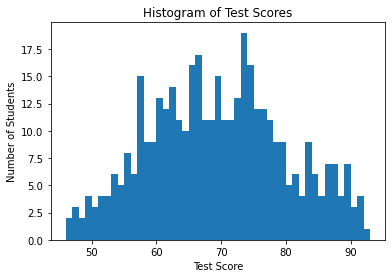

In [4]:
x = np.zeros(400) #Generates an initial array with 400 students
for i in range(400): #Loops through each of the students
    x[i] = (int)(25*(np.random.rand()-np.random.rand())+70) #Generates a random test score for that student
plt.hist(x,bins=int(np.max(x)-np.min(x))) #Plots a Histogram in range of all valid test scores
plt.title("Histogram of Test Scores")
plt.xlabel('Test Score')
plt.ylabel('Number of Students')

For simulation purposes, it is useful to be able to get a value after a single trial of an RV based on a certain distribution. These are called random variates. From the stats module we've used, you simply need to call the rvs function with a size as an input. NumPy also has an easy way to do this through the random module. When you run the code below, you should see two histograms from the same normal distributions. 

Text(0.5, 1.0, 'Histogram of NumPy Normal Distribution')

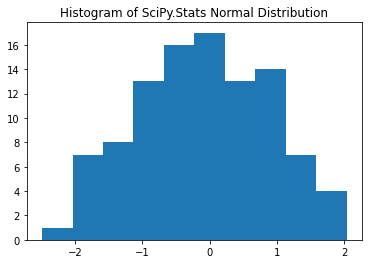

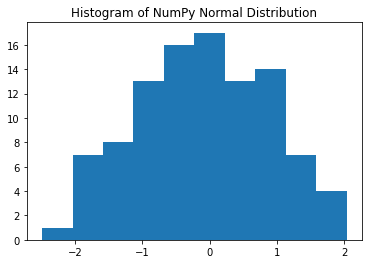

In [5]:
#Simulates a Gaussian RV 100 times in two different ways and creates a histogram

X = st.norm()
np.random.seed(100)
x = X.rvs(size = 100) #Generates a vector with the results of 100 outputs or trials based on the standard Gaussian distribution
np.random.seed(100)
y = np.random.normal(size = 100) #Generates a vector with the results of 100 outputs based on the standard Gaussian distribution
plt.hist(x); #Creates a histogram of those results, the default value for the number of bins is bins=10
plt.title('Histogram of SciPy.Stats Normal Distribution')
plt.figure()
plt.hist(y);
plt.title('Histogram of NumPy Normal Distribution')

The scipy and numpy methods for getting these variates should produce the same results, but the two histograms are different. This is due to the random number generator. If we seed the random number generator before running the methods, they should produce consistent results. In the code there are two commented lines with np.random.seed(100). Uncomment these, and run the code again. You should see the histograms are the same now. Essentially, seeding the random number generator, tells it where to start in it's sequence.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Using the custom discrete variable you made for a roll of the die in Lab 1, or some other method (include a text cell or a comment in the code to explain your method): 

1. Simulate 100 rolls using the .rvs() method in the stats module. Plot a histogram of the results. Is it what you would expect?
2. Now simulate 10,000 rolls of the die and again plot a histogram. Observe any difference and explain your observation. 

Text(0, 0.5, 'Number of Rolls')

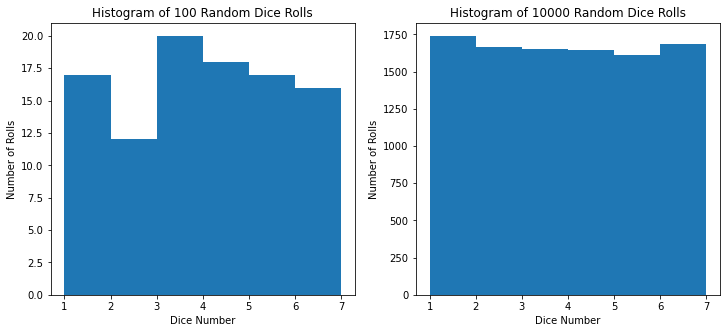

In [327]:
# Your code here

# Using custom discrete variable made for a roll of the die
# Dice Sides
sides = (1, 2, 3, 4, 5, 6)
# Dice Probability are all equal at 1/6
pr = (1./6., 1./6., 1./6., 1./6., 1./6., 1./6.)
# Create Object
die = st.rv_discrete(values=(sides,pr))

# Simulate 100 rolls
die_100 = die.rvs(size = 100)
# Simulate 10000 rolls
die_10000 = die.rvs(size = 10000)

#Histogram of 100 rolls
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.hist(die_100, bins=range(1,8)); 
plt.title('Histogram of 100 Random Dice Rolls')
plt.xlabel('Dice Number')
plt.ylabel('Number of Rolls')


#Histogram of 10000 rolls
plt.subplot(122)
plt.hist(die_10000, bins=range(1,8));
plt.title('Histogram of 10000 Random Dice Rolls')
plt.xlabel('Dice Number')
plt.ylabel('Number of Rolls')

__Answer:__ After plotting 100 dice rolls, the results are what I expect. The results are typically skewed; however, sometimes they do represent an equal 1/6 probability of each side. After plotting 10,000 dice rolls, the results are more consisent and begin to represent an equal 1/6 probability a majority of the time. Again, this is what I expect as the number of rolls is increased because outliers will be less apparent as the sample size increases. This is formally known as the Law of Large Numbers.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

## The Law of Large Numbers:

The law of large numbers describes the result of performing the same experiment a large number of times. Let $X_1,X_2, \ldots ,X_n$ be a set of uncorrelated random variables, each with a finite mean of $\mu$. Let $S_n$ represent the sum of these random variables: $S_n=X_1+X_2+...+X_n$. The law of large numbers states that $P\left\{\Big|\frac{S_n}{n}-\mu\Big|\ge\delta\right\}\le\frac{C}{n\delta^2}\to0$ as $n\to\infty$. Put another way this simply states that the sum of the RVs divided by n converges in some sense to the mean ($\frac{S_n}{n}\to\mu$). A proof of this is given in the ECE 313 textbook, using a bounded variance assumption and the Chebychev inequality.

To observe this behavior by simulation, let's look at the Poisson distribution. A Poisson RV has a single parameter $\lambda$ which represents the mean number of occurances or counts, such as the mean number of hits your Youtube video gets in a day.  Then the probability that your video gets $i$ hits in one day is given by the pmf: $p(i)=\frac{\lambda^ie^{-\lambda}}{i!}$. So what if you totalled the number of hits you received each day for a week, month, or year and divided by that many days? The law of large numbers asserts that as $n$ gets large this should go to the mean $\lambda$. Below, we create a Poisson distribution where $\lambda=5$ hits per day. We retrieve a random variate each day and model the law of large numbers over time. Try running the cell multiple times and see how much variation there is for different runs.

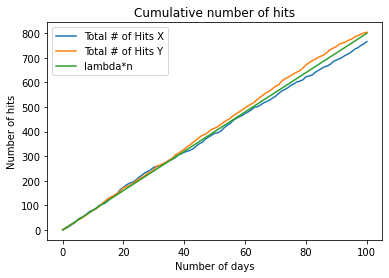

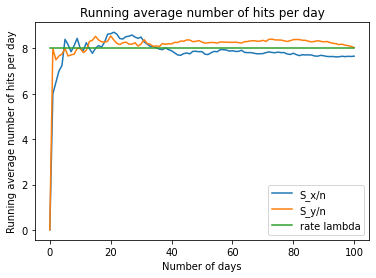

In [7]:
lamb = 8. #Our rate of hits per day
N = 100 #Number of days we are going to simulate over
x = [st.poisson.rvs(lamb)]    #Gets the number of hits on the first day and stores it in a vector
y = [np.random.poisson(lamb)] #Same using numpy instead of scipy.stats
Sx = [0] #Sx will represent cumulative sums of the random variates at different times
Sy = [0] 
Ax = [0.0] #Ax will be an array of averages, Sx/n, at different times
Ay = [0.0]

for n in range(1,N+1): #Simulates over N days
    x.append(st.poisson.rvs(lamb)) #Appends the number of hits of the next day to the vector
    y.append(np.random.poisson(lamb))
    Sx.append(Sx[n-1]+x[n]) #Appends the sum at n to the vector
    Sy.append(Sy[n-1]+y[n])
    Ax.append(Sx[n]/(1.*n)) #Appends the sum over n to the vector
    Ay.append(Sy[n]/(1.*n))

n = np.linspace(0,N,N+1) #Generates an array of N+1 points from 0 to N for graphing purposes

plt.plot(Sx, label = 'Total # of Hits X') #Plots the total number of hits
plt.plot(Sy, label = 'Total # of Hits Y')
plt.plot(n, lamb*n, label = 'lambda*n') #Plots a line based on the rate given
plt.title('Cumulative number of hits')
plt.ylabel('Number of hits')
plt.xlabel('Number of days')
plt.legend()

plt.figure() #Creates a new figure
plt.plot(Ax, label = 'S_x/n') #Plots the average number of hits
plt.plot(Ay, label = 'S_y/n')
plt.plot(lamb*np.ones(N+1), label = 'rate lambda') #Plots the expected average
plt.title('Running average number of hits per day')
plt.ylabel('Running average number of hits per day')
plt.xlabel('Number of days')
plt.legend()

You can play with the above code. Change $\lambda$ or change the number of days we simulate over. You should see that $\frac{S_n}{n}\to\lambda$ as the number of days, $n$, increases. 
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Using your discrete die rolling RV, once again simulate 10000 rolls of the die. 

1. Show graphically that the law of large numbers is maintained for the average of the numbers of the first $n$ rolls as $n\rightarrow\infty.$ 
2. What would be a rough approximation of the sum? Of the average?  

(Note: There is no parameter $\lambda$ associated with the roll of a die.  But the mean value of a roll plays the same role.)

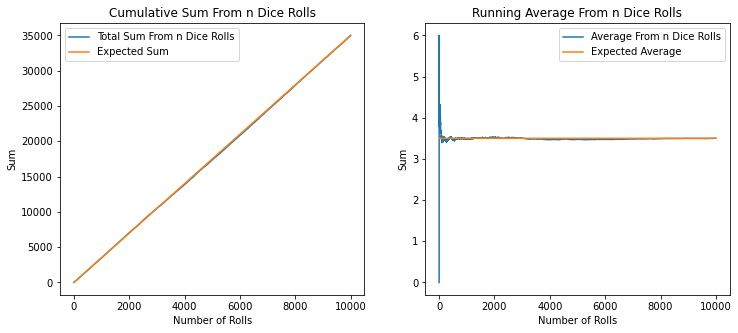

In [337]:
# Your code here
mean = 3.5 #Mean value of a dice roll
num_rolls = 10000 #Number of  rolls we are going to simulate over

# Simulate 10000 rolls
die_10000 = die.rvs(size = num_rolls)

die_sum = [0] #Represents the cumulative sums of the die rolls at different times
die_average = [0.0] #An array of averages, die_sum/n, at different times

for n in range(1, num_rolls + 1): #Simulates over 10000 trails
    die_sum.append(die_sum[n - 1] + die_10000[n - 1]) #Appends the sum at n to the vector
    die_average.append(die_sum[n] / (1.*n)) #Appends the sum over n to the vector

n = np.linspace(0, num_rolls, num_rolls + 1) #Generates an array of num_rolls + 1 points from 0 to num_rolls

plt.figure(figsize=(12,5)) #Creates a new figure
plt.subplot(121)
plt.plot(n, die_sum, label = 'Total Sum From n Dice Rolls') #Plots the total sum from random dice rolls
plt.plot(n, mean*n, label = 'Expected Sum') #Plots the total sum if average is 3.5
plt.title('Cumulative Sum From n Dice Rolls')
plt.ylabel('Sum')
plt.xlabel('Number of Rolls')
plt.legend()

plt.subplot(122)
plt.plot(die_average, label = 'Average From n Dice Rolls') #Plots the average number of hits
plt.plot(mean*np.ones(num_rolls + 1), label = 'Expected Average') #Plots the expected average
plt.title('Running Average From n Dice Rolls')
plt.ylabel('Sum')
plt.xlabel('Number of Rolls')
plt.legend()

__Answer:__ The graph of the total sum and average across 10,000 dice rolls is shown above. A dice can take the values {1,2,3,4,5,6}. The sum of this is 1 + 2 + 3 + 4 + 5 + 6 = 21. The average is 21 / 6 = 3.5. Over 10,000 dice rolls, the rough approximation of the sum would be 10,000 * 3.5 = 35,000. The average would of course be 3.5.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Additional Lab Questions:

**For the completion of this lab, make sure to do questions 1-2 as well as these two additional questions:**
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** If you thought you could get out of your first probability lab without some questions on poker hands, I'm sorry, but they're too good to pass up. Suppose you draw five cards from a standard 52 card deck.
<ol><li>Calculate the probabilities of getting a TWO PAIR, THREE OF A KIND, FULLHOUSE, and a FLUSH; print out these probabilities. You need to write down your calculation process, either in a markdown or code cell, not just the result probabilities. (Note: FLUSHes include straight/royal FLUSHes) </li> 
<li>Simulate 1,000,000 poker hands, count the number of times you get for each of the above hands and find the empirical probability of getting each of the above hands.  Your simulated hands
should include all possible poker hands. (Hint: One way to represent a random poker hand is to use a 4 by 13 binary array with ones placed at five randomly chosen locations.  The np.sum command can be used to compute row or column sums. If you don't know how to generate random integers in Python, Google is a good source for help.)</li>
<li>Do the probabilities match up relatively well?</li>
</ol>

(For most lab questions in ECE314, you will be graded based on the correctness of your answers, regardless of how you code. However, for part 2 of this problem, you may lose a few points for very inefficient code, e.g. with a lot of for loops and unecessary if structures. As a general guideline, if your program can run in one minute (for 1,000,000 hands), it should be sufficiently efficient, although this is not a hard requirement). 

In [9]:
# Code to calculate the probabilities of the given hands
from math import factorial

def comb(n, k):
    return (factorial(n) / (factorial(k)*factorial(n-k)))

# Two Pair
# Overview: Combinations for 1st and 2nd pair * 44 Remaining single cards / 2 for double counting same 2 pairs.
two_pair = ((13 * comb(4, 2) * 12 * comb(4, 2) * 44) / (2 * comb(52, 5))) * 100
print("Probability of Two Pair: {}%" .format(two_pair))
print()

# Three of a Kind
# Overview: Combinations for 3 of the same card * 48 and 44 for remaining singles / 2 for double counting same 2 singles. 
three_of_kind = ((13 * comb(4, 3) * 48 * 44) / (2 * comb(52, 5))) * 100
print("Probability of Three of a Kind: {}%" .format(three_of_kind))
print()

# Full House
# Overview: Combinations for 3 of the same card * combinations for two of the same cards with the remaining available cards
full_house = ((13 * comb(4, 3) * 12 * comb(4, 2)) / (comb(52, 5))) * 100
print("Probability of Full House: {}%" .format(full_house))
print()

# Flush
# Overview: Combinations for 5 cards of the same suit * 4 suits
flush = (4 * comb(13, 5)) / (comb(52, 5)) * 100
print("Probability of Flush: {}%" .format(flush))
print()

Probability of Two Pair: 4.75390156062425%

Probability of Three of a Kind: 2.112845138055222%

Probability of Full House: 0.14405762304921968%

Probability of Flush: 0.19807923169267708%



In [286]:
# Your code here
import random
import time
start_time = time.time()

# 52 Card Deck
deck = np.zeros((4, 13))

# Main
num_two_pair = 0
num_three_of_kind = 0
num_full_house = 0
num_flush = 0

trials = 1000000
cards = [item for item in range(0, 52)]
hand = np.zeros(5)
column_sum = 0
column_twos = 0
column_threes = 0
for i in range(trials):
    # Clear Hand
    for i in range(5):
        hand[i] = -1
        
    # Randomly Generate Hand of 5 Cards
    for i in range(5):
        choice = random.choice(cards)
        # Garuntee 5 different cards
        while(choice in hand):
            choice = random.choice(cards)
        hand[i] = choice
        
    # Add Cards in Hand to 2D Array
    for i in range(5):
        Row = (int)(hand[i] / 13)
        Column = (int)(hand[i] % 13)
        deck[Row][Column] = 1
    
    # Sum Rows
    for i in range(4):
        # Detect Flush
        if (np.sum(deck[i]) == 5):
            num_flush = num_flush + 1
            
    # Sum Columns
    for i in range(13):
        column_sum = np.sum(deck[:,i])
        if (column_sum == 2):
            column_twos = column_twos + 1
        if (column_sum == 3):
            column_threes = column_threes + 1
            
    # Detect Two Pair, Full House, and Three of a Kind
    if (column_twos == 2):
        num_two_pair = num_two_pair + 1
    elif (column_threes == 1 and column_twos == 1):
        num_full_house = num_full_house + 1
    elif (column_threes == 1):
        num_three_of_kind = num_three_of_kind + 1
    
    # Clear Sums
    column_twos = 0
    column_threes = 0
    
    # Clear 2D Array
    for i in range(5):
        Row = (int)(hand[i] / 13)
        Column = (int)(hand[i] % 13)
        deck[Row][Column] = 0

# Summarize Hands
print("Number of Two Pairs: {}" .format(num_two_pair))
print("Probability of Two Pairs: {}%" .format((num_two_pair/trials) * 100))
print()
print("Number of Three of a Kind: {}" .format(num_three_of_kind))
print("Probability of Three of a Kind: {}%" .format((num_three_of_kind/trials) * 100))
print()
print("Number of Full House: {}" .format(num_full_house))
print("Probability of Full House: {}%" .format((num_full_house/trials) * 100))
print()
print("Number of Flush: {}" .format(num_flush))
print("Probability of Flush: {}%" .format((num_flush/trials) * 100))
print()
print("Took", time.time() - start_time, "seconds to run")

Number of Two Pairs: 47483
Probability of Two Pairs: 4.7482999999999995%

Number of Three of a Kind: 20930
Probability of Three of a Kind: 2.093%

Number of Full House: 1405
Probability of Full House: 0.1405%

Number of Flush: 2092
Probability of Flush: 0.2092%

Took 82.68844842910767 seconds to run


__Answer:__ All the probabilities for Two Pair, Three of a Kind, Full House, and Flush are very close to the expected probabilites that were calculated using the code block above.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>** A classic problem when being introduced to probability is the Monty Hall problem. If you've ever seen "Let's Make a Deal" on television, this problem takes from that show. You're the contestant. The host of the show gives you three doors to choose from. One door chosen at random holds a grand prize and the other two hold worthless items. You choose your door, and then the host reveals one of the doors you didn't choose such that it always holds a worthless item.  (If you initially choose the door with the grand prize, the host reveals either of the other doors with equal probability.) So now there are two doors left and the host asks you whether you would like to switch. What should you do?
<ol><li>Write down your first reaction? Would you switch doors or keep the one you have? Why?</li>
    <li>Create this scenario and simulate the strategy of sticking with the same door 1,000,000 times. What percentage of time did you win?</li>
    <li>Simulate the strategy of switching doors 1,000,000 times. What percentage of time did you win?</li>
    <li>Which strategy would you use now? Explain why this is the case.</li>
</ol>

In the simulation, you can simulate every step that happens in the actual game and exactly as it happens, even for very trivial steps. You can also clever-guess some parts and skip some trivial steps; if you do that, make sure you briefly reason about why you do so in comments, so that the graders know that you understand what actually happens in the game. There is no timing requirement for this problem.  

__Answer of Part 1:__ I would not switch doors because I don't want to second guess myself. Additionally, I would believe that the host would try to trick me to switch to get me off the correct choice of winning the prize. 

In [325]:
# Your code here
import random
import time
start_time = time.time()

trials = 1000000
doors = [1, 2, 3]
# Stay Strategy
# Overview: You choose your door. The host shows a losing door, then asks the question to switch. Of course, you stay
# because you have the strategy to stay with your original choice. Thus, your original choice is just the outcome.
# If you are correct, you will win the prize; otherwise you will lose
num_win_stay = 0
for i in range(trials):
    prize = random.choice(doors)
    choice = random.choice(doors)
    if (choice == prize):
        num_win_stay = num_win_stay + 1

#Switch Strategy
# Overview: You choose your door. The host shows a losing door, then asks the question to switch. Of course, you switch
# because you have the strategy to switch to a different choice. This means that if your original choice was correct, you lose
# because you will switch to the wrong door. However, if your original choice was incorrect, you win because the host will
# reveal an incorrect door. Of course, the remaining door must be the prize so switching would result in a win. 
# If you are incorrect, you will win the prize; otherwise you will lose
num_win_switch = 0
for i in range(trials):
    prize = random.choice(doors)
    choice = random.choice(doors)
    if (choice != prize):
        num_win_switch = num_win_switch + 1

# Summary
print("Probability of win by staying: {}%" .format((num_win_stay/trials)*100))
print("Probability of win by switching: {}%" .format((num_win_switch/trials)*100))
print()
print("Took", time.time() - start_time, "seconds to run")

Probability of win by staying: 33.3598%
Probability of win by switching: 66.6539%

Took 2.2811262607574463 seconds to run


__Answer of Part 4:__ I would use the switching strategy. The reason is because this strategy has a higher probability of winning. You basically have 2/3 probability to choice the wrong door and switch to the right one, while you have a 1/3 probability of choosing the correct door by not switching.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>**

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 